 # WATER POTABILITY PREDICTION MODEL

The dataset used for this model was gotten from https://www.hydroshare.org/resource/4ab43e1b507b496b9b42749701daed5c/

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
df = pd.read_excel('Datasets/aquaattributes.xlsx')

In [4]:
df.head(20)

,Stationcode,Locations,Lat,Lon,Capitalcity,State,Temperature,D.O,pH,Conductivity,B.O.D,Nitrate,Fecalcaliform,Totalcaliform,class
0,1001,BEAS AT U/S MANALI,32.244947,77.191080,Shimla,HIMACHAL PRADESH,9.0,9.0,8.0,85,0.10,0.2,106,397.0,yes
1,1002,BEAS AT D/S KULU,31.960582,77.114009,Shimla,HIMACHAL PRADESH,10.0,9.0,8.0,102,0.30,0.4,153,954.0,yes
2,1003,BEAS AT D/S AUT,26.887893,75.811484,Shimla,HIMACHAL PRADESH,11.0,9.0,8.0,96,0.20,0.3,58,653.0,yes
3,1004,BEAS AT U/S PANDON DAM,47.351943,19.633621,Shimla,HIMACHAL PRADESH,13.0,9.0,8.0,94,0.20,0.4,34,317.0,yes
4,1005,BEAS AT EXIT OF TUNNEL DEHAL POWER HOUSE,25.992786,91.826111,Shimla,HIMACHAL PRADESH,14.0,10.0,8.0,112,0.20,0.5,213,1072.0,yes
5,1550,U/S MANDI,31.708165,76.931367,Shimla,HIMACHAL PRADESH,16.0,9.0,8.0,117,0.20,0.5,100,722.0,yes
6,1006,BEAS AT D/S MANDI,31.708165,76.931367,Shimla,HIMACHAL PRADESH,16.0,9.0,8.0,155,0.50,0.7,445,1855.0,yes
7,2604,BEAS AT D/S JAISINGHPUR,31.899643,76.597945,Shimla,HIMACHAL PRADESH,19.0,8.0,8.0,211,0.50,0.5,7,72.0,yes
8,1007,BEAS AT D/S ALAMPUR,15.884349,78.119382,Shimla,HIMACHAL PRADESH,19.0,8.0,8.0,202,0.60,0.4,9,123.0,yes
9,1008,BEAS AT D/S DEHRAGOPIPUR,31.881756,76.214645,Shimla,HIMACHAL PRADESH,19.0,8.0,8.0,280,0.70,1.1,10,157.0,yes


In [5]:
df.shape

(1361, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1361 entries, 0 to 1360
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Stationcode    1361 non-null   int64  
 1   Locations      1361 non-null   object 
 2   Lat            1294 non-null   float64
 3   Lon            1294 non-null   float64
 4   Capitalcity    1361 non-null   object 
 5   State          1360 non-null   object 
 6   Temperature    1327 non-null   float64
 7   D.O            1352 non-null   float64
 8   pH             1360 non-null   float64
 9   Conductivity   1324 non-null   object 
 10  B.O.D          1293 non-null   float64
 11  Nitrate        1152 non-null   object 
 12  Fecalcaliform  1173 non-null   object 
 13  Totalcaliform  1226 non-null   float64
 14  class          1361 non-null   object 
dtypes: float64(7), int64(1), object(7)
memory usage: 159.6+ KB


In [7]:
df.isnull().sum()

Stationcode        0
Locations          0
Lat               67
Lon               67
Capitalcity        0
State              1
Temperature       34
D.O                9
pH                 1
Conductivity      37
B.O.D             68
Nitrate          209
Fecalcaliform    188
Totalcaliform    135
class              0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(967, 15)

In [10]:
df.isnull().sum()

Stationcode      0
Locations        0
Lat              0
Lon              0
Capitalcity      0
State            0
Temperature      0
D.O              0
pH               0
Conductivity     0
B.O.D            0
Nitrate          0
Fecalcaliform    0
Totalcaliform    0
class            0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 967 entries, 0 to 1360
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Stationcode    967 non-null    int64  
 1   Locations      967 non-null    object 
 2   Lat            967 non-null    float64
 3   Lon            967 non-null    float64
 4   Capitalcity    967 non-null    object 
 5   State          967 non-null    object 
 6   Temperature    967 non-null    float64
 7   D.O            967 non-null    float64
 8   pH             967 non-null    float64
 9   Conductivity   967 non-null    object 
 10  B.O.D          967 non-null    float64
 11  Nitrate        967 non-null    object 
 12  Fecalcaliform  967 non-null    object 
 13  Totalcaliform  967 non-null    float64
 14  class          967 non-null    object 
dtypes: float64(7), int64(1), object(7)
memory usage: 120.9+ KB


In [12]:
cndt = df['Conductivity']

In [13]:
[x for x in cndt.apply(type).unique()]

[int, float]

In [14]:
df['Conductivity'] = df['Conductivity'].astype(float)

In [15]:
nitr = df['Nitrate']

In [16]:
[x for x in nitr.apply(type).unique()]

[float, int]

In [17]:
df['Nitrate'] = df['Nitrate'].astype(float)

In [18]:
fclf = df['Fecalcaliform']

In [19]:
[x for x in fclf.apply(type).unique()]

[int, float]

In [20]:
df['Fecalcaliform'] = df['Fecalcaliform'].astype(float)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 967 entries, 0 to 1360
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Stationcode    967 non-null    int64  
 1   Locations      967 non-null    object 
 2   Lat            967 non-null    float64
 3   Lon            967 non-null    float64
 4   Capitalcity    967 non-null    object 
 5   State          967 non-null    object 
 6   Temperature    967 non-null    float64
 7   D.O            967 non-null    float64
 8   pH             967 non-null    float64
 9   Conductivity   967 non-null    float64
 10  B.O.D          967 non-null    float64
 11  Nitrate        967 non-null    float64
 12  Fecalcaliform  967 non-null    float64
 13  Totalcaliform  967 non-null    float64
 14  class          967 non-null    object 
dtypes: float64(10), int64(1), object(4)
memory usage: 120.9+ KB


In [22]:
df.describe()

,Stationcode,Lat,Lon,Temperature,D.O,pH,Conductivity,B.O.D,Nitrate,Fecalcaliform,Totalcaliform
count,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,9.670000e+02,9.670000e+02
mean,1899.374354,20.970569,78.364700,25.355714,6.891423,7.668664,1323.534458,3.738066,5.075913,1.773840e+05,5.361407e+05
std,706.222881,6.459671,6.894196,4.413136,1.674220,0.478087,3703.988886,8.546417,30.069937,3.792506e+06,1.015845e+07
min,4.000000,8.388518,19.633621,5.000000,0.000000,5.200000,25.250000,0.000000,0.000000,1.400000e+00,5.000000e-03
25%,1326.500000,17.000538,74.970558,24.000000,6.200000,7.450000,201.500000,1.021250,0.304167,1.579167e+01,5.000000e+01
50%,1960.000000,21.007658,76.852727,26.458333,7.091667,7.788333,388.000000,2.091667,0.800000,1.441667e+02,4.650000e+02
75%,2515.500000,26.234941,80.964831,27.908333,7.750000,8.000000,754.333333,3.936667,2.000000,8.245833e+02,1.746665e+03
max,3029.000000,47.351943,95.999123,37.500000,30.366667,9.575000,36593.000000,158.750000,640.000000,1.100000e+08,2.500000e+08


In [23]:
df_new = df.loc[:,['Temperature','D.O','pH','Conductivity','B.O.D','Nitrate','Fecalcaliform','Totalcaliform','class']]

In [24]:
df_new['class'] = df_new['class'] == 'yes'

In [25]:
df_new.head()

,Temperature,D.O,pH,Conductivity,B.O.D,Nitrate,Fecalcaliform,Totalcaliform,class
0,9.0,9.0,8.0,85.0,0.1,0.2,106.0,397.0,True
1,10.0,9.0,8.0,102.0,0.3,0.4,153.0,954.0,True
2,11.0,9.0,8.0,96.0,0.2,0.3,58.0,653.0,True
3,13.0,9.0,8.0,94.0,0.2,0.4,34.0,317.0,True
4,14.0,10.0,8.0,112.0,0.2,0.5,213.0,1072.0,True


In [26]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 967 entries, 0 to 1360
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    967 non-null    float64
 1   D.O            967 non-null    float64
 2   pH             967 non-null    float64
 3   Conductivity   967 non-null    float64
 4   B.O.D          967 non-null    float64
 5   Nitrate        967 non-null    float64
 6   Fecalcaliform  967 non-null    float64
 7   Totalcaliform  967 non-null    float64
 8   class          967 non-null    bool   
dtypes: bool(1), float64(8)
memory usage: 68.9 KB


In [27]:
df_new.corr()

,Temperature,D.O,pH,Conductivity,B.O.D,Nitrate,Fecalcaliform,Totalcaliform,class
Temperature,1.000000,-0.137697,-0.062000,0.132268,0.059620,0.026301,-0.013133,-0.013379,-0.162458
D.O,-0.137697,1.000000,0.194636,-0.092865,-0.280783,0.011558,-0.165299,-0.182276,-0.147469
pH,-0.062000,0.194636,1.000000,-0.008232,-0.004717,-0.147210,0.008265,0.009426,-0.298328
Conductivity,0.132268,-0.092865,-0.008232,1.000000,0.164644,-0.008017,-0.003694,-0.003406,0.069188
B.O.D,0.059620,-0.280783,-0.004717,0.164644,1.000000,0.004074,0.053959,0.063619,0.047831
Nitrate,0.026301,0.011558,-0.147210,-0.008017,0.004074,1.000000,-0.005780,-0.006528,0.005181
Fecalcaliform,-0.013133,-0.165299,0.008265,-0.003694,0.053959,-0.005780,1.000000,0.848463,0.024510
Totalcaliform,-0.013379,-0.182276,0.009426,-0.003406,0.063619,-0.006528,0.848463,1.000000,0.027741
class,-0.162458,-0.147469,-0.298328,0.069188,0.047831,0.005181,0.024510,0.027741,1.000000


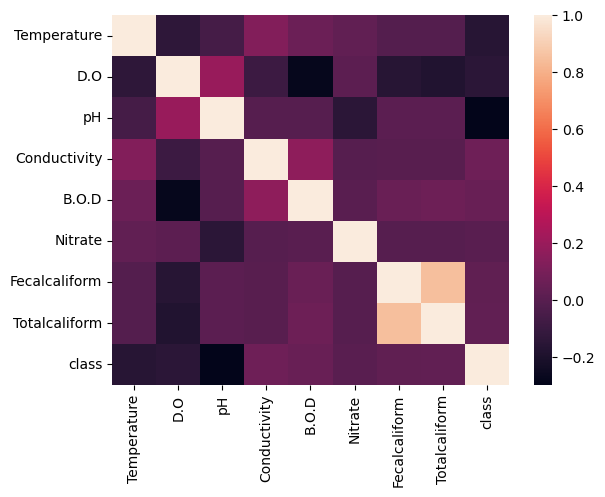

In [28]:
sns.heatmap(df_new.corr());

In [29]:
X = df.loc[:,['Temperature','D.O','pH','Conductivity','B.O.D','Nitrate','Totalcaliform']]

In [30]:
df_new = df.loc[:,['Temperature','D.O','pH','Conductivity','B.O.D','Nitrate','Fecalcaliform','Totalcaliform','class']]

In [31]:
df_new['class'] = df_new['class'] == 'yes'

In [32]:
df_new.head()

,Temperature,D.O,pH,Conductivity,B.O.D,Nitrate,Fecalcaliform,Totalcaliform,class
0,9.0,9.0,8.0,85.0,0.1,0.2,106.0,397.0,True
1,10.0,9.0,8.0,102.0,0.3,0.4,153.0,954.0,True
2,11.0,9.0,8.0,96.0,0.2,0.3,58.0,653.0,True
3,13.0,9.0,8.0,94.0,0.2,0.4,34.0,317.0,True
4,14.0,10.0,8.0,112.0,0.2,0.5,213.0,1072.0,True


In [33]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 967 entries, 0 to 1360
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    967 non-null    float64
 1   D.O            967 non-null    float64
 2   pH             967 non-null    float64
 3   Conductivity   967 non-null    float64
 4   B.O.D          967 non-null    float64
 5   Nitrate        967 non-null    float64
 6   Fecalcaliform  967 non-null    float64
 7   Totalcaliform  967 non-null    float64
 8   class          967 non-null    bool   
dtypes: bool(1), float64(8)
memory usage: 68.9 KB


In [34]:
df_new.corr()

,Temperature,D.O,pH,Conductivity,B.O.D,Nitrate,Fecalcaliform,Totalcaliform,class
Temperature,1.000000,-0.137697,-0.062000,0.132268,0.059620,0.026301,-0.013133,-0.013379,-0.162458
D.O,-0.137697,1.000000,0.194636,-0.092865,-0.280783,0.011558,-0.165299,-0.182276,-0.147469
pH,-0.062000,0.194636,1.000000,-0.008232,-0.004717,-0.147210,0.008265,0.009426,-0.298328
Conductivity,0.132268,-0.092865,-0.008232,1.000000,0.164644,-0.008017,-0.003694,-0.003406,0.069188
B.O.D,0.059620,-0.280783,-0.004717,0.164644,1.000000,0.004074,0.053959,0.063619,0.047831
Nitrate,0.026301,0.011558,-0.147210,-0.008017,0.004074,1.000000,-0.005780,-0.006528,0.005181
Fecalcaliform,-0.013133,-0.165299,0.008265,-0.003694,0.053959,-0.005780,1.000000,0.848463,0.024510
Totalcaliform,-0.013379,-0.182276,0.009426,-0.003406,0.063619,-0.006528,0.848463,1.000000,0.027741
class,-0.162458,-0.147469,-0.298328,0.069188,0.047831,0.005181,0.024510,0.027741,1.000000


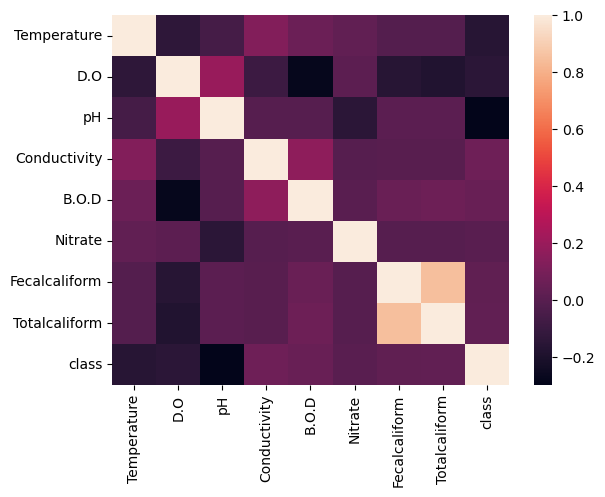

In [35]:
sns.heatmap(df_new.corr());

In [45]:
X = df.loc[:,['Temperature','D.O','Conductivity','B.O.D','Totalcaliform']]

In [46]:
X.head()

,Temperature,D.O,Conductivity,B.O.D,Totalcaliform
0,9.0,9.0,85.0,0.1,397.0
1,10.0,9.0,102.0,0.3,954.0
2,11.0,9.0,96.0,0.2,653.0
3,13.0,9.0,94.0,0.2,317.0
4,14.0,10.0,112.0,0.2,1072.0


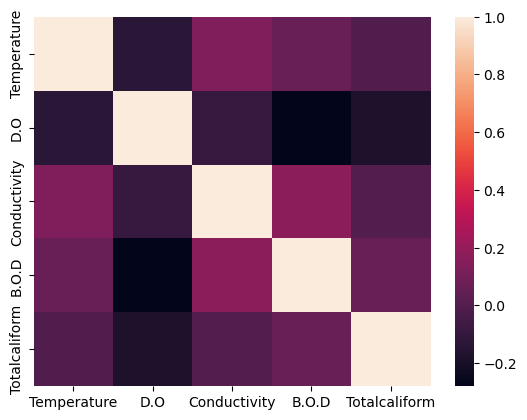

In [47]:
sns.heatmap(X.corr());

In [54]:
[x for x in df['class'].apply(type).unique()]

[str]

In [55]:
df_new['class'].unique()

array([ True, False])

In [56]:
y = df_new['pH']

In [57]:
y.value_counts()

8.000000    72
7.600000    24
7.500000    22
7.800000    22
7.700000    22
            ..
7.872000     1
7.680000     1
7.637500     1
7.545000     1
7.453636     1
Name: pH, Length: 577, dtype: int64

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8, random_state = 123)

In [60]:
X_train.shape

(773, 5)

In [61]:
y_train.shape

(773,)

In [62]:
X_val.shape

(194, 5)

In [67]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error as MSE

In [71]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700, 1000, 1200, 1500]

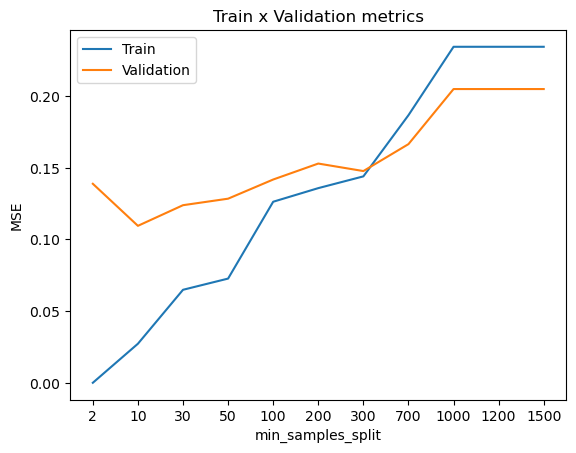

In [72]:
MSE_list_train = []
MSE_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeRegressor(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [73]:
min_samples_split_list = np.arange(2,30)

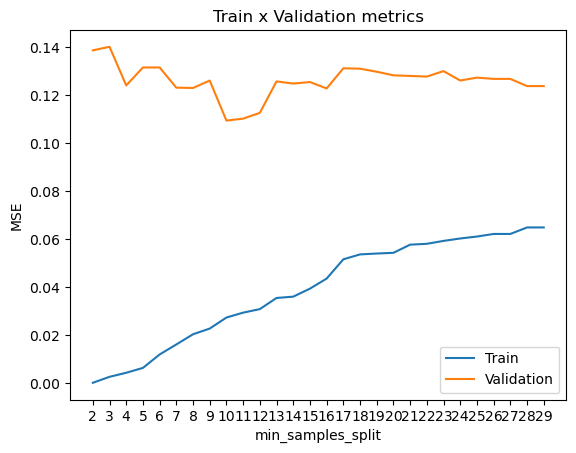

In [74]:
MSE_list_train = []
MSE_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeRegressor(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [75]:
min_samples_split_list = np.arange(5,15)

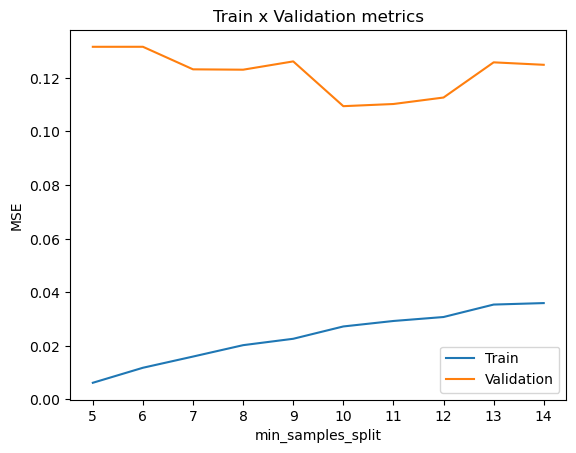

In [76]:
MSE_list_train = []
MSE_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeRegressor(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [77]:
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None]

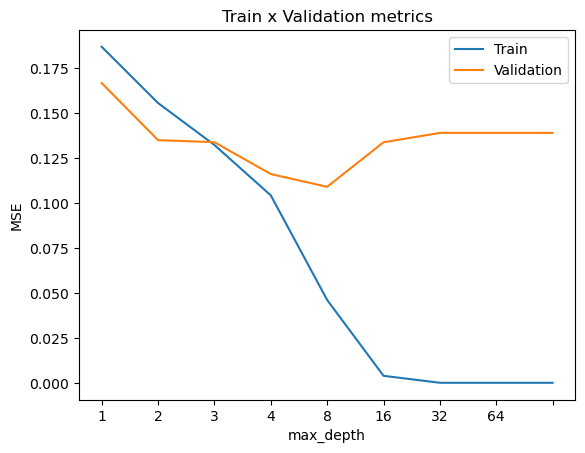

In [79]:
MSE_list_train = []
MSE_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeRegressor(max_depth = max_depth,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [80]:
max_depth_list = np.arange(4,16)

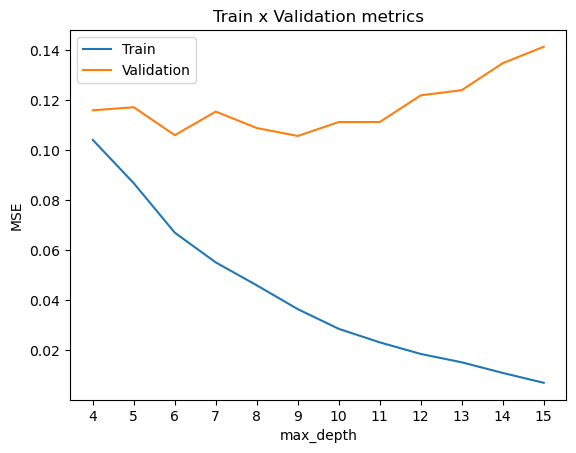

In [81]:
MSE_list_train = []
MSE_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeRegressor(max_depth = max_depth,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

    Chosen max_depth = 6
    Chosen min_samples_split = 10

In [82]:
decision_tree_model = DecisionTreeRegressor(min_samples_split = 10,
                                             max_depth = 6,
                                             random_state = 123).fit(X_train,y_train)

In [85]:
print(f"MSE for train:\n\tMSE: {MSE(decision_tree_model.predict(X_train),y_train):.4f}")
print(f"MSE for validation:\n\tMSE: {MSE(decision_tree_model.predict(X_val),y_val):.4f}")

MSE for train:
	MSE: 0.0709
MSE for validation:
	MSE: 0.1084


In [86]:
y_pred_pH = decision_tree_model.predict(X_val)

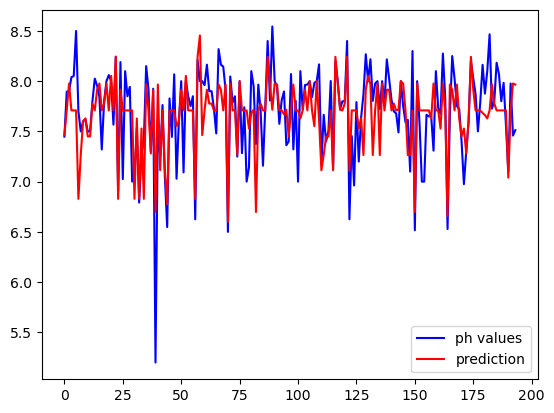

In [87]:
plt.plot(range(len(y_val)),y_val,'b',label='ph values')
plt.plot(range(len(y_pred_pH)),y_pred_pH,'r',label='prediction')
plt.legend(loc='best');

In [88]:
diff_pH = y_pred_pH - y_val

In [92]:
y_pred_pH.shape

(194,)

In [93]:
y_val.shape

(194,)

In [94]:
diff_pH.shape

(194,)

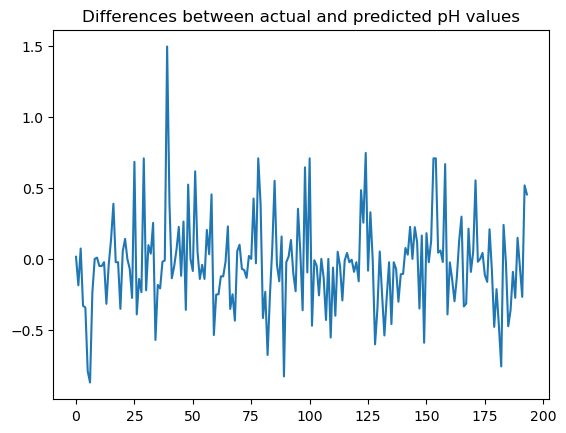

In [95]:
plt.plot(range(len(diff_pH)),diff_pH)
plt.title('Differences between actual and predicted pH values');

In [96]:
decision_tree_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 123,
 'splitter': 'best'}

In [99]:
from sklearn.ensemble import RandomForestRegressor

In [102]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700, 1000, 1200, 1500, 2000]

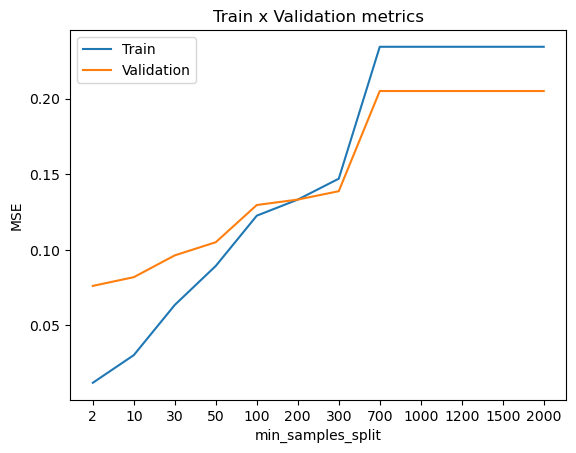

In [103]:
MSE_list_train = []
MSE_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestRegressor(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [104]:
min_samples_split_list = np.arange(2,11)

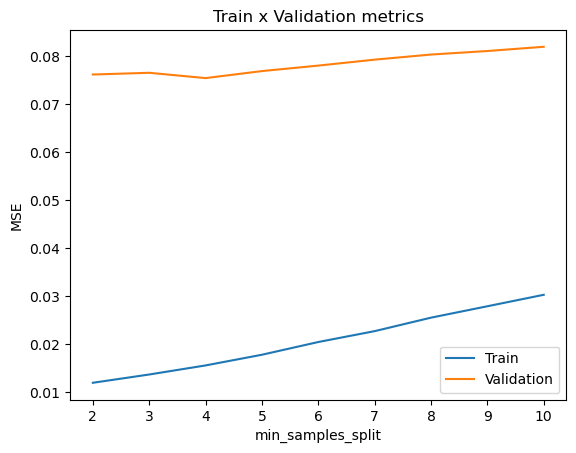

In [105]:
MSE_list_train = []
MSE_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestRegressor(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [107]:
max_depth_list = [2, 4, 8, 16, 32, 64, None]

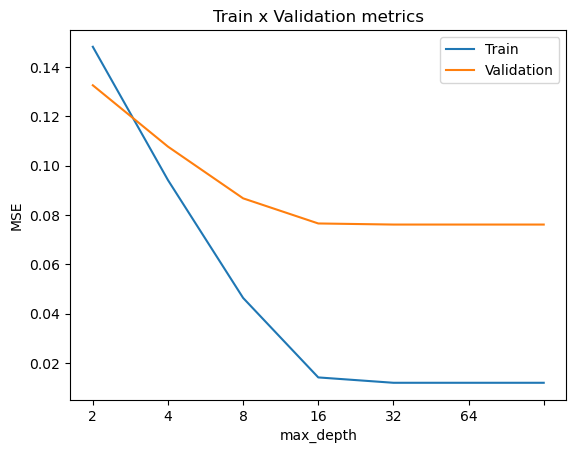

In [108]:
MSE_list_train = []
MSE_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestRegressor(max_depth = max_depth,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [109]:
max_depth_list = np.arange(8,33)

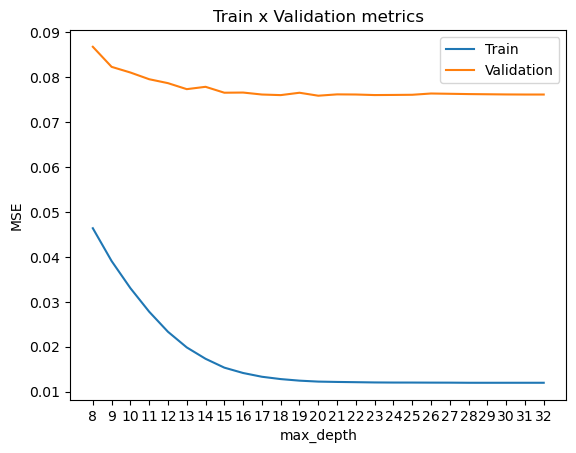

In [110]:
MSE_list_train = []
MSE_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestRegressor(max_depth = max_depth,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [115]:
ind_max_depth = np.argmin(MSE_list_val)
ind_max_depth

12

In [118]:
best_max_depth = max_depth_list[ind_max_depth]
best_max_depth

20

In [119]:
n_estimators_list = [10,50,100,500,1000,2000]

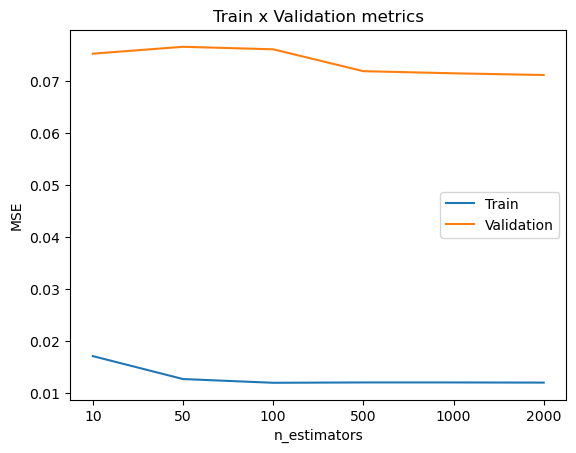

In [122]:
MSE_list_train = []
MSE_list_val = []
for n_estimators in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestRegressor(n_estimators = n_estimators,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [123]:
n_estimators_list = np.arange(100,1000,50)

In [ ]:
MSE_list_train = []
MSE_list_val = []
for n_estimators in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestRegressor(n_estimators = n_estimators,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);